___

# Face Detection

In [24]:
import os
import shutil
import random

# Define paths
BASE_DIR = r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo"
TRAIN_SRC_IMG = os.path.join(BASE_DIR, "train", "images")
TRAIN_SRC_LBL = os.path.join(BASE_DIR, "train", "labels")
VAL_SRC_IMG = os.path.join(BASE_DIR, "val", "images")
VAL_SRC_LBL = os.path.join(BASE_DIR, "val", "labels")

TRAIN_DST_IMG = os.path.join(BASE_DIR, "train_1000", "images")
TRAIN_DST_LBL = os.path.join(BASE_DIR, "train_1000", "labels")
VAL_DST_IMG = os.path.join(BASE_DIR, "val_1000", "images")
VAL_DST_LBL = os.path.join(BASE_DIR, "val_1000", "labels")

os.makedirs(TRAIN_DST_IMG, exist_ok=True)
os.makedirs(TRAIN_DST_LBL, exist_ok=True)
os.makedirs(VAL_DST_IMG, exist_ok=True)
os.makedirs(VAL_DST_LBL, exist_ok=True)

# Randomly select 1000 images for train and validation
train_images = random.sample(os.listdir(TRAIN_SRC_IMG), 1000)
val_images = random.sample(os.listdir(VAL_SRC_IMG), 1000)

def copy_files(image_list, src_img, src_lbl, dst_img, dst_lbl):
    for img in image_list:
        img_path = os.path.join(src_img, img)
        lbl_path = os.path.join(src_lbl, img.replace(".jpg", ".txt"))

        if os.path.exists(img_path) and os.path.exists(lbl_path):
            shutil.copy(img_path, dst_img)
            shutil.copy(lbl_path, dst_lbl)

copy_files(train_images, TRAIN_SRC_IMG, TRAIN_SRC_LBL, TRAIN_DST_IMG, TRAIN_DST_LBL)
copy_files(val_images, VAL_SRC_IMG, VAL_SRC_LBL, VAL_DST_IMG, VAL_DST_LBL)

print("✅ 1000 images successfully sampled for train and val!")


✅ 1000 images successfully sampled for train and val!


In [25]:
yaml_content = """train: C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/lfw_yolo/train_1000/images
val: C:/Users/binkh/Documents/CSCN8010/CSCN8010-labs/lfw_yolo/val_1000/images

nc: 1
names: ['face']
"""

with open(r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\data_1000.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data_1000.yaml file created successfully!")


✅ data_1000.yaml file created successfully!


In [26]:
from ultralytics import YOLO

# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  

# Train the model with 1000 images
model.train(data=r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\data_1000.yaml",
            epochs=5, 
            batch=16, 
            imgsz=640)

print("✅ Training completed!")


Ultralytics 8.3.82  Python-3.11.9 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-13620H)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\data_1000.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\train_1000\labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:02<00:00, 396.68it/s]


train: New cache created: C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\train_1000\labels.cache


val: Scanning C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\val_1000\labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:02<00:00, 389.34it/s]


val: New cache created: C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\val_1000\labels.cache
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.438      1.819      1.597         15        640: 100%|██████████| 63/63 [09:08<00:00,  8.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:46<00:00,  8.95s/it]


                   all       1000       1101      0.966       0.83      0.916        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.148      1.199      1.357         15        640: 100%|██████████| 63/63 [12:35<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:56<00:00,  9.26s/it]


                   all       1000       1101      0.924      0.808      0.882      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.071     0.9844      1.271         20        640: 100%|██████████| 63/63 [12:30<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:51<00:00,  9.11s/it]


                   all       1000       1101      0.993      0.914      0.934      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.015      0.847      1.232         15        640: 100%|██████████| 63/63 [12:30<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:50<00:00,  9.09s/it]


                   all       1000       1101      0.984      0.921      0.937      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.9028     0.7372      1.168         19        640: 100%|██████████| 63/63 [12:28<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:51<00:00,  9.10s/it]


                   all       1000       1101      0.987      0.919      0.939      0.745

5 epochs completed in 1.397 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.82  Python-3.11.9 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-13620H)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [04:16<00:00,  8.02s/it]


                   all       1000       1101      0.987      0.919      0.939      0.744
Speed: 4.7ms preprocess, 228.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs\detect\train5
✅ Training completed!


In [29]:
import shutil

TRAINED_MODEL_PATH = r"runs\detect\train5\weights\best.pt"
SAVE_PATH = r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\best_1000.pt"

shutil.copy(TRAINED_MODEL_PATH, SAVE_PATH)
print("✅ Model saved successfully at:", SAVE_PATH)


✅ Model saved successfully at: C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\best_1000.pt


In [50]:
import cv2
from ultralytics import YOLO

# Load the trained model
model = YOLO(r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\best_1000.pt")

# Path to test image
TEST_IMAGE_PATH = r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\test\Benzema.jpeg"

# Run inference
results = model(TEST_IMAGE_PATH, save=True)

print("✅ Inference completed! Check runs/detect/predict/ for results.")



image 1/1 C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\test\Benzema.jpeg: 640x576 1 face, 100.7ms
Speed: 3.2ms preprocess, 100.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs\detect\predict4
✅ Inference completed! Check runs/detect/predict/ for results.


In [51]:
import matplotlib.pyplot as plt

# Load the test image
img = cv2.imread(TEST_IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Show image with bounding boxes
plt.imshow(img)
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

In [52]:

for result in results:
    print("Detected boxes:", result.boxes.xyxy)


Detected boxes: tensor([[ 61.4265,  15.4690, 153.1033, 108.9668]])


## Test Image from the web 

In [53]:
from PIL import Image
import os

def display_image(image_path):
    """Displays an image from a given file path."""
    try:
        img = Image.open(image_path)
        img.show()  # Opens the image in your default image viewer.
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to your image
image_path = r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\test\Benzema.jpeg" #The r is used to make it a raw string.

# Check if the file exists before attempting to display it.
if os.path.exists(image_path):
    display_image(image_path)
else:
    print(f"Error: Image file does not exist at the specified path: {image_path}")

#Alternatively, if you want to display the image within a jupyter notebook:
#from IPython.display import display, Image
#display(Image(filename=image_path))

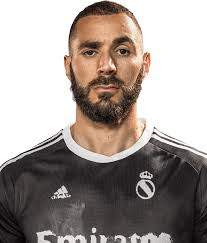

## Bounding boxes

In [57]:
results[0].show()


<!DOCTYPE html>
<html>
<head>
    <title>Benzema Image</title>
</head>
<body>
    <img src="

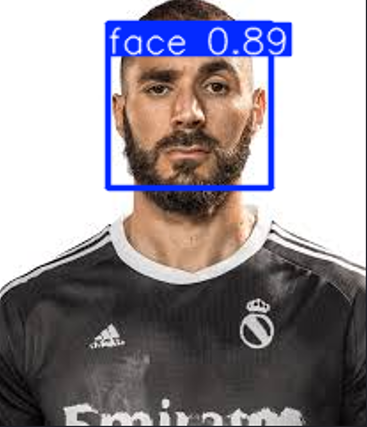

In [62]:
import cv2
from ultralytics import YOLO

# Load the trained model
model = YOLO(r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\best_1000.pt")

# Path to test image
TEST_IMAGE_PATH = r"C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\test\trial.jpg"

# Run inference
results = model(TEST_IMAGE_PATH, save=True)

print("✅ Inference completed! Check runs/detect/predict/ for results.")



image 1/1 C:\Users\binkh\Documents\CSCN8010\CSCN8010-labs\lfw_yolo\test\trial.jpg: 448x640 1 face, 92.0ms
Speed: 6.3ms preprocess, 92.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict7
✅ Inference completed! Check runs/detect/predict/ for results.


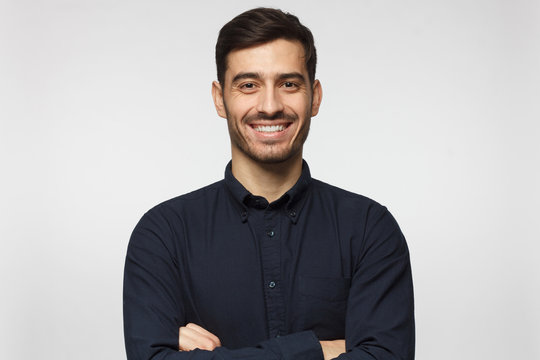

In [63]:
results[0].show()

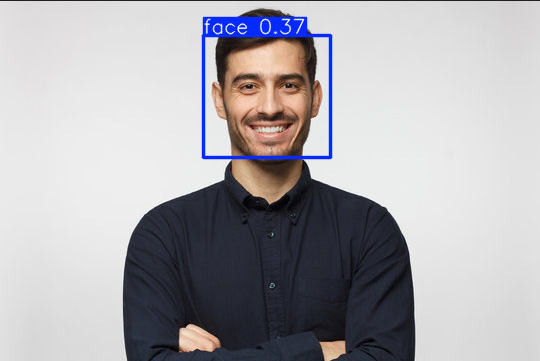